# The objective of this project is to build a Deep learning model that can accurately recognize handwritten digits.

## Read Dataset

In [1]:
import pandas as pd
A = pd.read_csv(r"C:\Users\Pranit\Downloads\digitsnpixels.csv")

In [2]:
A.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Plot an image

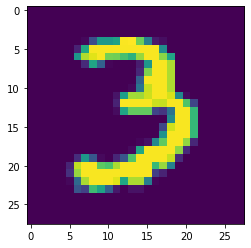

In [3]:
import matplotlib.pyplot as plt
plt.imshow(A[9:10].drop(labels=['label'],axis=1).values.reshape(28,28))

## X and Y

In [4]:
Y = A["label"].values
Ynew = pd.get_dummies(Y).values

In [5]:
Xnew = A.drop(labels=['label'],axis=1).values/255

## Training and testing set

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

## Create a CNN

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D,MaxPooling2D,Flatten, BatchNormalization

In [8]:
nn = Sequential()

nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))    #matrix size reduced
nn.add(MaxPooling2D(pool_size=(2,2)))            # dividing in 2*2 
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())
nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))

In [9]:
nn.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="adam")
nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3)

Epoch 1/3
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1809 - accuracy: 0.9445 - val_loss: 0.0773 - val_accuracy: 0.9768
Epoch 2/3
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0625 - val_accuracy: 0.9836
Epoch 3/3
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 0.0647 - val_accuracy: 0.9835


In [10]:
xtrain.shape

(33600, 28, 28, 1)

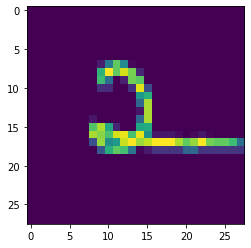

In [11]:
plt.imshow(A[55:56].drop(labels=['label'],axis=1).values.reshape(28,28))

In [12]:
nn.predict(A[55:56].drop(labels=['label'],axis=1).values.reshape(1,28,28,1))

1/1 [==============================] - 0s 171ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Here we recognised our digits correctly model is performing good with 98% accuracy